In [1]:
url = "https://www.motor.no/bil/sjekk-motors-rekkevidde-resultater-bilmodell-for-bilmodell/202424

SyntaxError: EOL while scanning string literal (1810072957.py, line 1)

In [2]:
from bs4 import BeautifulSoup
import requests

def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables
tables=fetch_html_tables('https://www.motor.no/bil/sjekk-motors-rekkevidde-resultater-bilmodell-for-bilmodell/202424')
table_html=tables[0]

In [3]:
print(str(table_html)[:1000])

<table class="">
<thead>
<tr>
<td>
            
            Bilmodell
            </td>
<td>
            
            Test
            </td>
<td>
            
            Rekkevidde i testen
            </td>
<td>
            
            Oppgitt WLTP
            </td>
<td>
            
            Avvik i prosent
            </td>
<td>
            
            Forbruk (målt) kWt/ 100km
            </td>
<td>
            
            Forbruk (oppgitt) kWt/ 100km
            </td>
<td>
            
            Utstyrsnivå
            </td>
</tr>
</thead>
<tbody>
<tr><td>Audi e-tron 55</td><td>Sommer 2020</td><td>399 km</td><td>370 km</td><td>7,83</td><td>20,3</td><td>24,3</td><td>Advanced Business</td></tr>
<tr><td>Audi e-tron 55 Sportback</td><td>Sommer 2020</td><td>436 km</td><td>376 km</td><td>15,95</td><td>19,8</td><td>23,9</td><td>S-Line</td></tr>
<tr><td>Audi e-tron Quattro 50</td><td>Vinter 2020</td><td>259 km</td><td>332 km</td><td>−13,38</td><td>N/A</td><td>23,9</td><td>Advance

In [34]:
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)

In [35]:
print(str(table)[:1000])

[['                        Bilmodell            ', '                        Test            ', '                        Rekkevidde i testen            ', '                        Oppgitt WLTP            ', '                        Avvik i prosent            ', '                        Forbruk (målt) kWt/ 100km            ', '                        Forbruk (oppgitt) kWt/ 100km            ', '                        Utstyrsnivå            '], ['Audi e-tron 55', 'Sommer 2020', '399 km', '370 km', '7,83', '20,3', '24,3', 'Advanced Business'], ['Audi e-tron 55 Sportback', 'Sommer 2020', '436 km', '376 km', '15,95', '19,8', '23,9', 'S-Line'], ['Audi e-tron Quattro 50', 'Vinter 2020', '259 km', '332 km', '−13,38', 'N/A', '23,9', 'Advanced Sport'], ['Audi e-tron Quattro 55', 'Vinter 2020', '341 km', '415 km', '−11,42', '24,4', '24,3', 'Advanced Business'], ['Audi e-Tron GT quattro', 'Sommer 2021', '528,1 km', '468 km', '12,84', '16,1', '20,1', 'GT quattro Pro'], ['BMW i3', 'Sommer 2020', '319

In [36]:
';'.join(table[0])

'                        Bilmodell            ;                        Test            ;                        Rekkevidde i testen            ;                        Oppgitt WLTP            ;                        Avvik i prosent            ;                        Forbruk (målt) kWt/ 100km            ;                        Forbruk (oppgitt) kWt/ 100km            ;                        Utstyrsnivå            '

In [37]:
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('wltp.csv',table)

In [43]:
import pandas as pd
g_df = pd.read_csv("wltp.csv", delimiter=';', encoding='latin1')#reading data
g_df

,Bilmodell,Test,Rekkevidde i testen,Oppgitt WLTP,Avvik i prosent,Forbruk (mÃ¥lt) kWt/ 100km,Forbruk (oppgitt) kWt/ 100km,UtstyrsnivÃ¥
0,Audi e-tron 55,Sommer 2020,399 km,370 km,"7,83","20,3","24,3",Advanced Business
1,Audi e-tron 55 Sportback,Sommer 2020,436 km,376 km,"15,95","19,8","23,9",S-Line
2,Audi e-tron Quattro 50,Vinter 2020,259 km,332 km,"â13,38",NaN,"23,9",Advanced Sport
3,Audi e-tron Quattro 55,Vinter 2020,341 km,415 km,"â11,42","24,4","24,3",Advanced Business
4,Audi e-Tron GT quattro,Sommer 2021,"528,1 km",468 km,"12,84","16,1","20,1",GT quattro Pro
...,...,...,...,...,...,...,...,...
83,Volvo XC40 Recharge P8,Sommer 2021,"445,4 km",415 km,"7,33","17,5","24,0",Recharge P8 AWD
84,Volvo XC40 Recharge P8,Vinter 2021,332 km,409 km,"â18,82","21,8","23,9",Recharge Pure Electric P8
85,Xpeng G3,Sommer 2020,506 km,450 km,"12,44","13,1","14,7",Smart
86,Xpeng G3,Sommer 2021,"438,9 km",451 km,"â2,68",-,"14,7",Premium


In [40]:
import pandas as pd
from skimpy import clean_columns # kommer ikke videre fordi colnames ikke kan cleanes.

KeyError: 'Oppgitt WLTP'

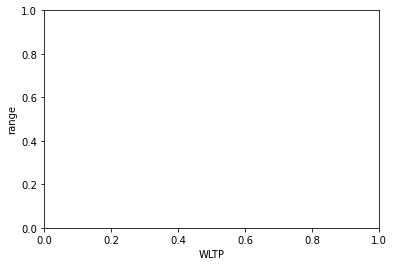

In [41]:
from matplotlib import pyplot as plt

fig,ax=plt.subplots()

#adding axis lables:
ax.set_ylabel('range')
ax.set_xlabel('WLTP')

#plotting the function:
ax.scatter(g_df["Oppgitt WLTP"], g_df['Rekkevidde i testen'],  label='Observasjoner')
ax.legend(loc='lower right',frameon=False)